In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

1. Загрузка датасета

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


2. Дескриптивный анализ: размерность, типы признаков, пропуски

In [4]:
print("Размерность датасета:", df.shape)

print("\nТипы признаков:")
print(df.dtypes)

print("\nКоличество пропусков в каждом столбце:")
print(df.isna().sum())
df.describe().T

Размерность датасета: (8950, 18)

Типы признаков:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Количество пропусков в каждом столбце:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY       

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


3. Обработка пропусков (первичный вариант)

В этом датасете пропуски есть, например, в MINIMUM_PAYMENTS, CREDIT_LIMIT и др.
Для старта можно сделать простую стратегию: заменить на медиану.

In [5]:
# Сохраним исходные названия колонок
cols = df.columns

# Удалим ID, если он есть
if 'CUST_ID' in df.columns:
    df = df.drop(columns=['CUST_ID'])

# Обработка пропусков: медиана по каждому числовому признаку
df = df.fillna(df.median(numeric_only=True))

df.isna().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

В датасете присутствуют пропуски (NaN), которые не равны нулю и не означают фактическое значение признака. Замена пропусков на медиану является корректной стратегией, поскольку медиана минимально искажает распределение переменной и не создаёт искусственных выбросов. Такой подход позволяет сохранить структуру данных и обеспечивает корректную работу методов кластеризации.

4. Проверка распределения переменных (гистограммы + «похожесть» на нормальное)

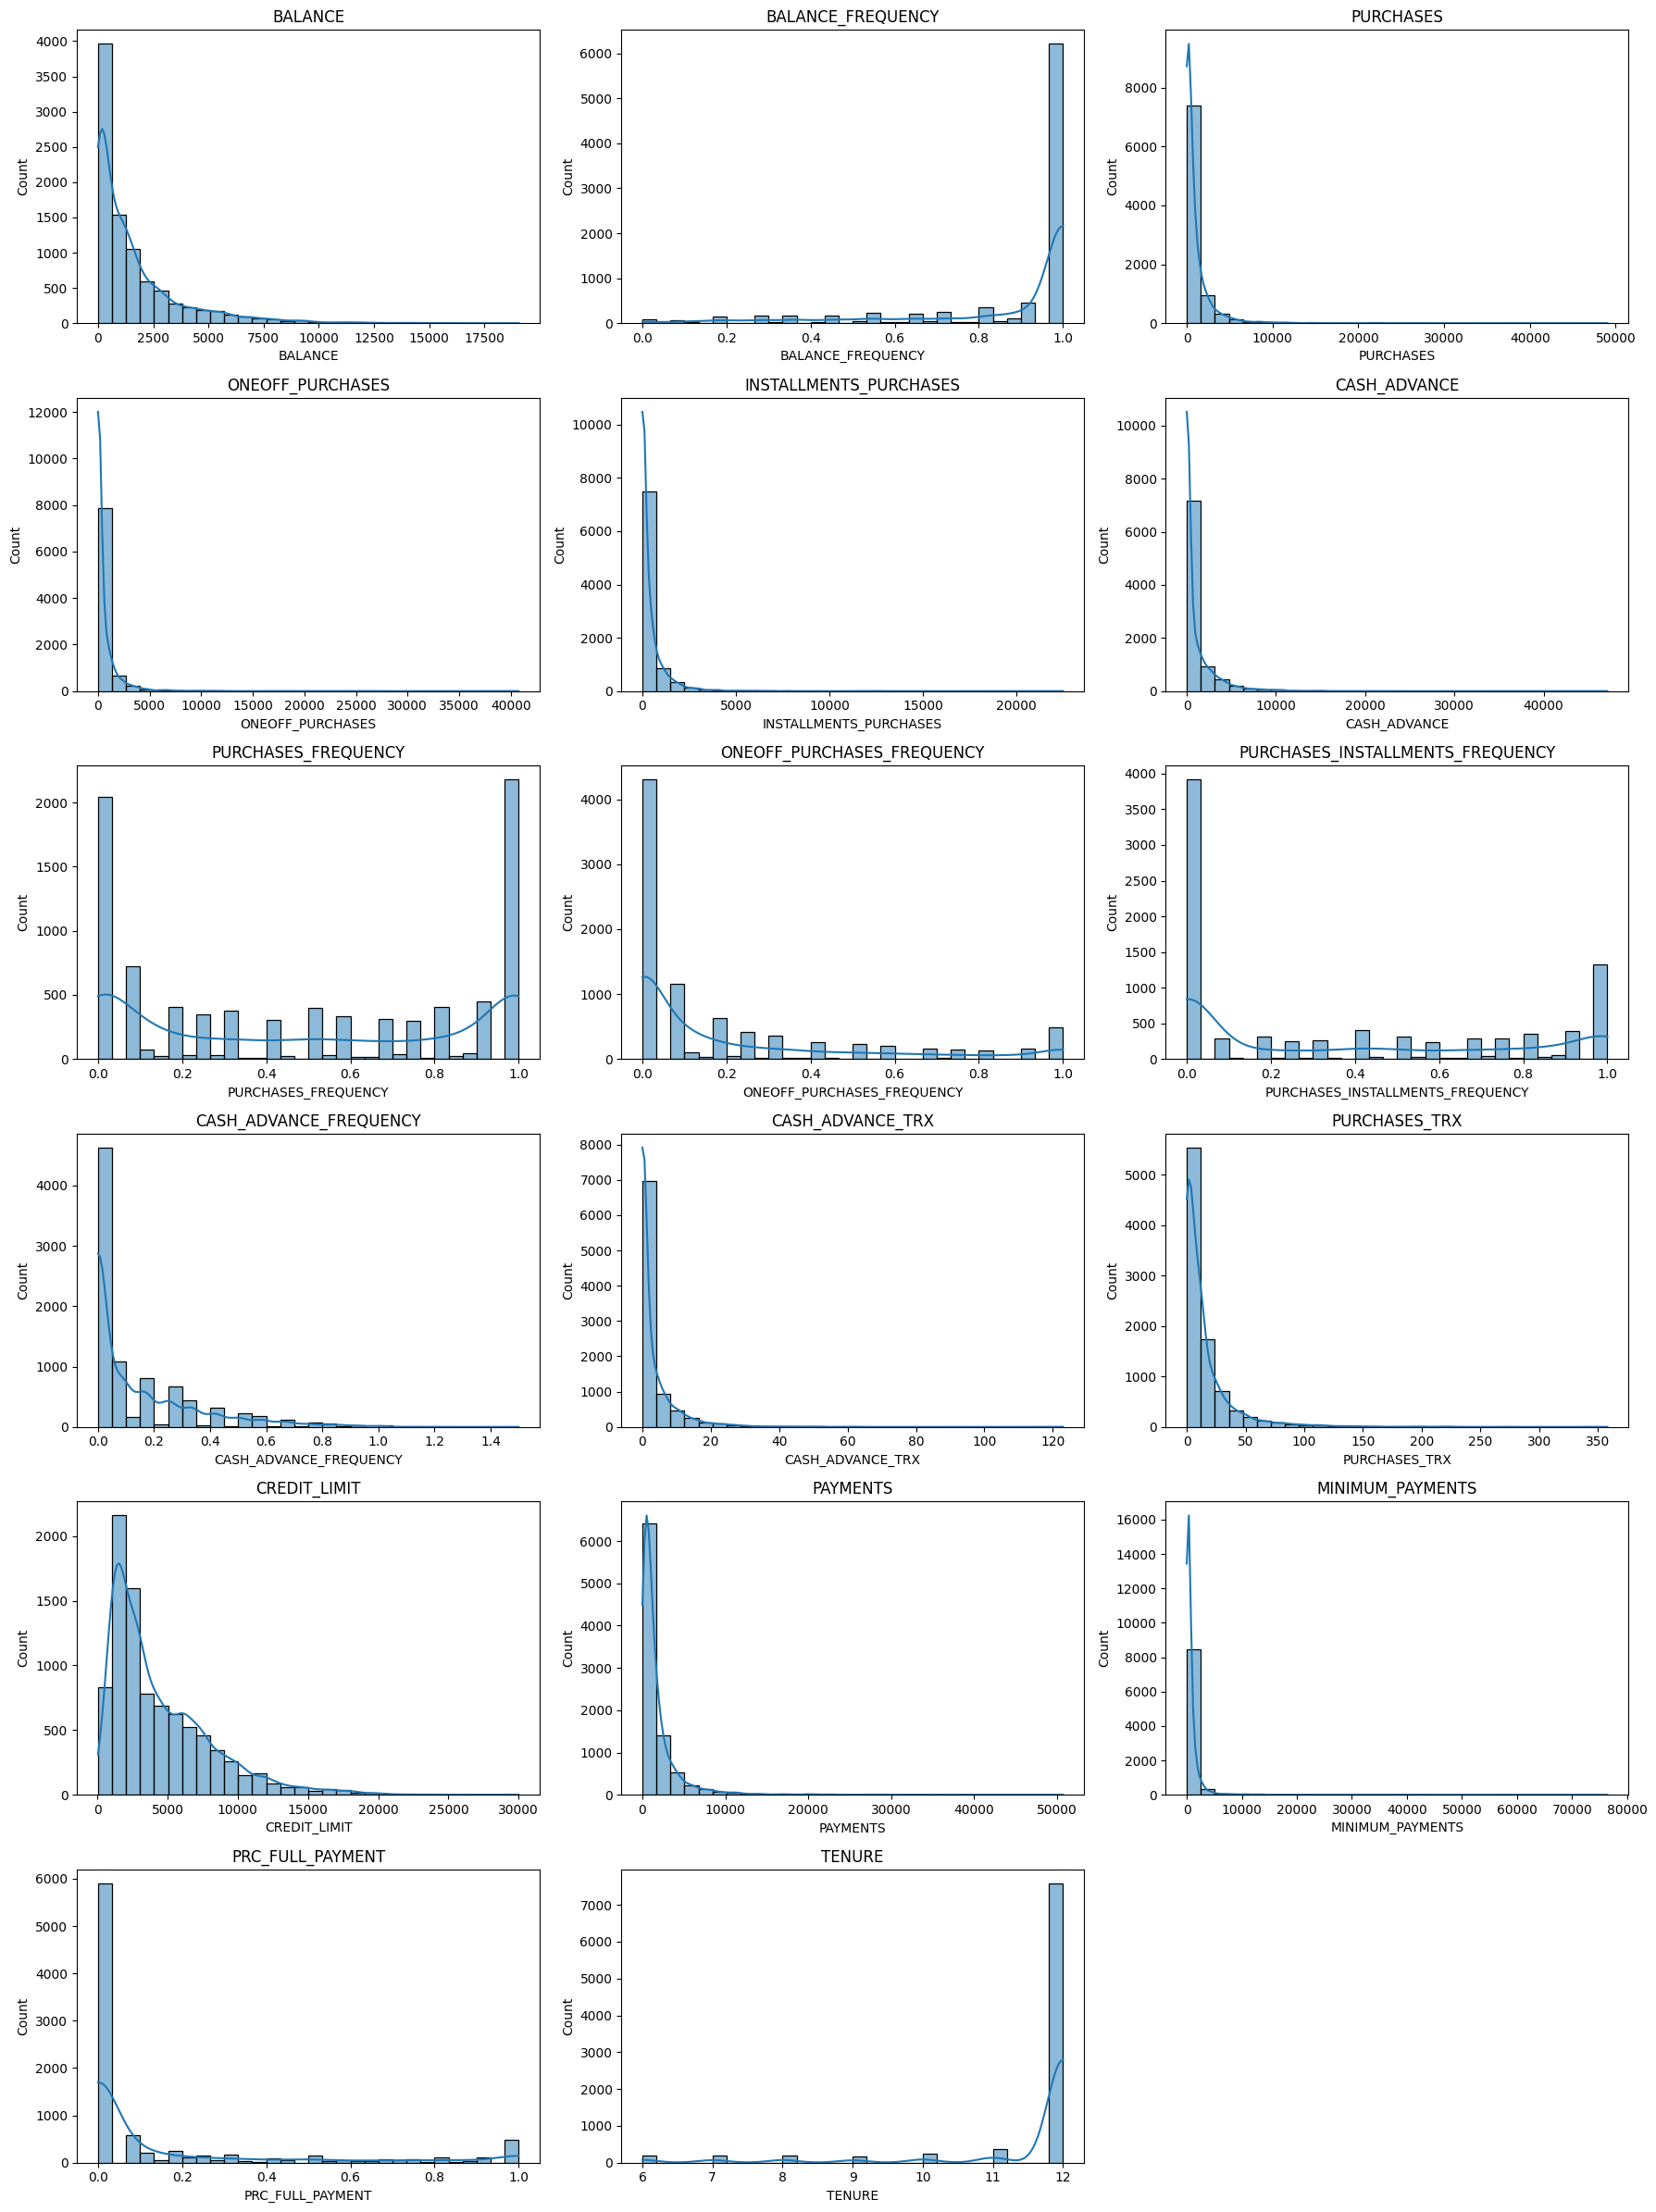

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем количество признаков
num_cols = df.columns

# Размер сетки
n = len(num_cols)
rows = (n // 3) + 1  # 3 графика в строке

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


Данные не являются нормальными, содержат выбросы и имеют разные масштабы. Это подтверждает необходимость масштабирования (StandardScaler) и использования методов кластеризации, устойчивых к таким данным (например, K-Means + GMM).

5. Информационная значимость / «полезность» признаков

Раз у нас нет классов, то формально посчитать классический feature importance нельзя.
Нам достаточно:

посмотреть дисперсии;

проверить признаки с почти нулевой вариацией (мало информативны);

посмотреть корреляции.

In [7]:
# Дисперсия признаков
variances = df.var()
print(variances.sort_values())


CASH_ADVANCE_FREQUENCY              4.004857e-02
BALANCE_FREQUENCY                   5.612351e-02
PRC_FULL_PAYMENT                    8.555578e-02
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
PURCHASES_FREQUENCY                 1.610985e-01
TENURE                              1.791129e+00
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
INSTALLMENTS_PURCHASES              8.178274e+05
ONEOFF_PURCHASES                    2.755228e+06
BALANCE                             4.332775e+06
CASH_ADVANCE                        4.398096e+06
PURCHASES                           4.565208e+06
MINIMUM_PAYMENTS                    5.441920e+06
PAYMENTS                            8.381394e+06
CREDIT_LIMIT                        1.323975e+07
dtype: float64


Дисперсия признаков сильно различается из-за разной природы переменных: частотные признаки имеют диапазон 0–1 и, соответственно, малую дисперсию, в то время как денежные показатели варьируются на несколько порядков и обладают высокой дисперсией. Это подтверждает необходимость стандартизации данных перед кластеризацией, чтобы избежать доминирования признаков с большим масштабом.

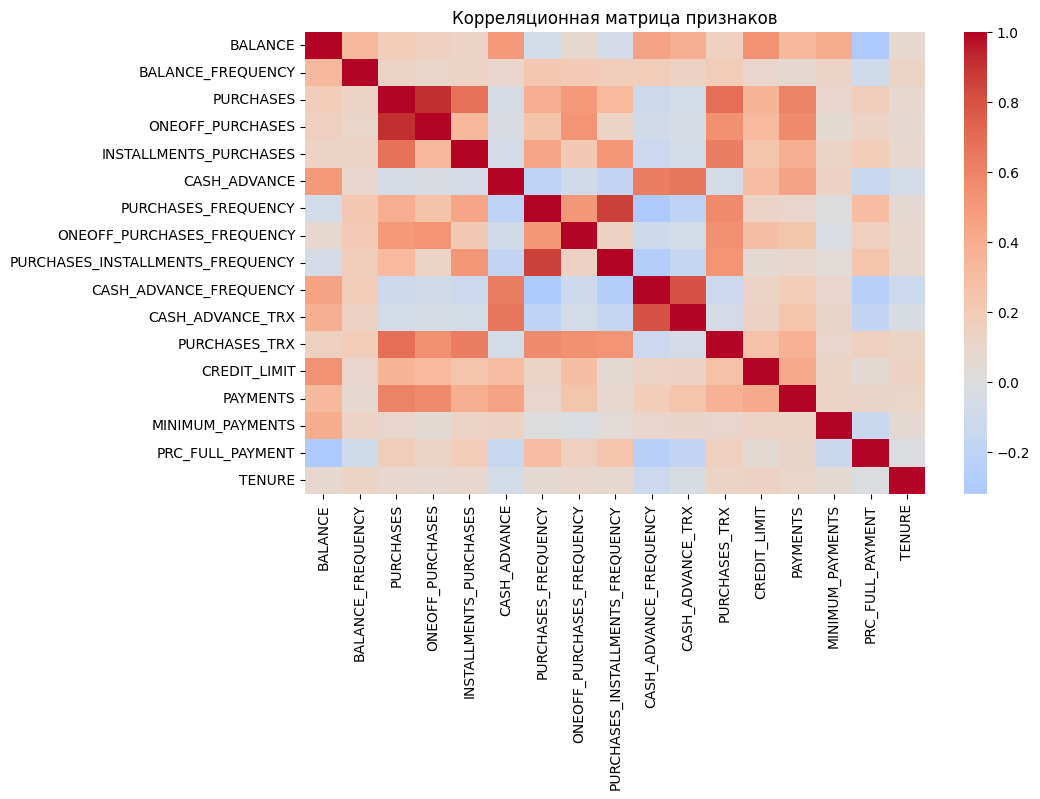

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Корреляционная матрица признаков")
plt.show()


Корреляционный анализ выявил несколько логичных групп связанных признаков (покупки и транзакции; снятие наличных), однако большинство переменных имеют слабую или умеренную корреляцию. Это означает, что данные содержат разнообразную и не избыточную информацию, что благоприятно для кластеризации.

Признаки TENURE и PRC_FULL_PAYMENT практически не коррелируют с остальными переменными, поэтому они вносят независимую информацию о поведении клиентов. Это увеличивает разнообразие данных и позволяет алгоритмам кластеризации выделять дополнительные осмысленные группы.

6. Проверка условий для кластеризации 

Вопросы:

Отсутствие классов – да, в этом датасете нет метки класса → это чистая кластерация.

Осмысленность кластеризации – признаки описывают поведение клиентов по кредитке → логично искать группы (сегментация клиентов).

Отсутствие выбросов – проверим быстро: боксплоты по нескольким признакам.

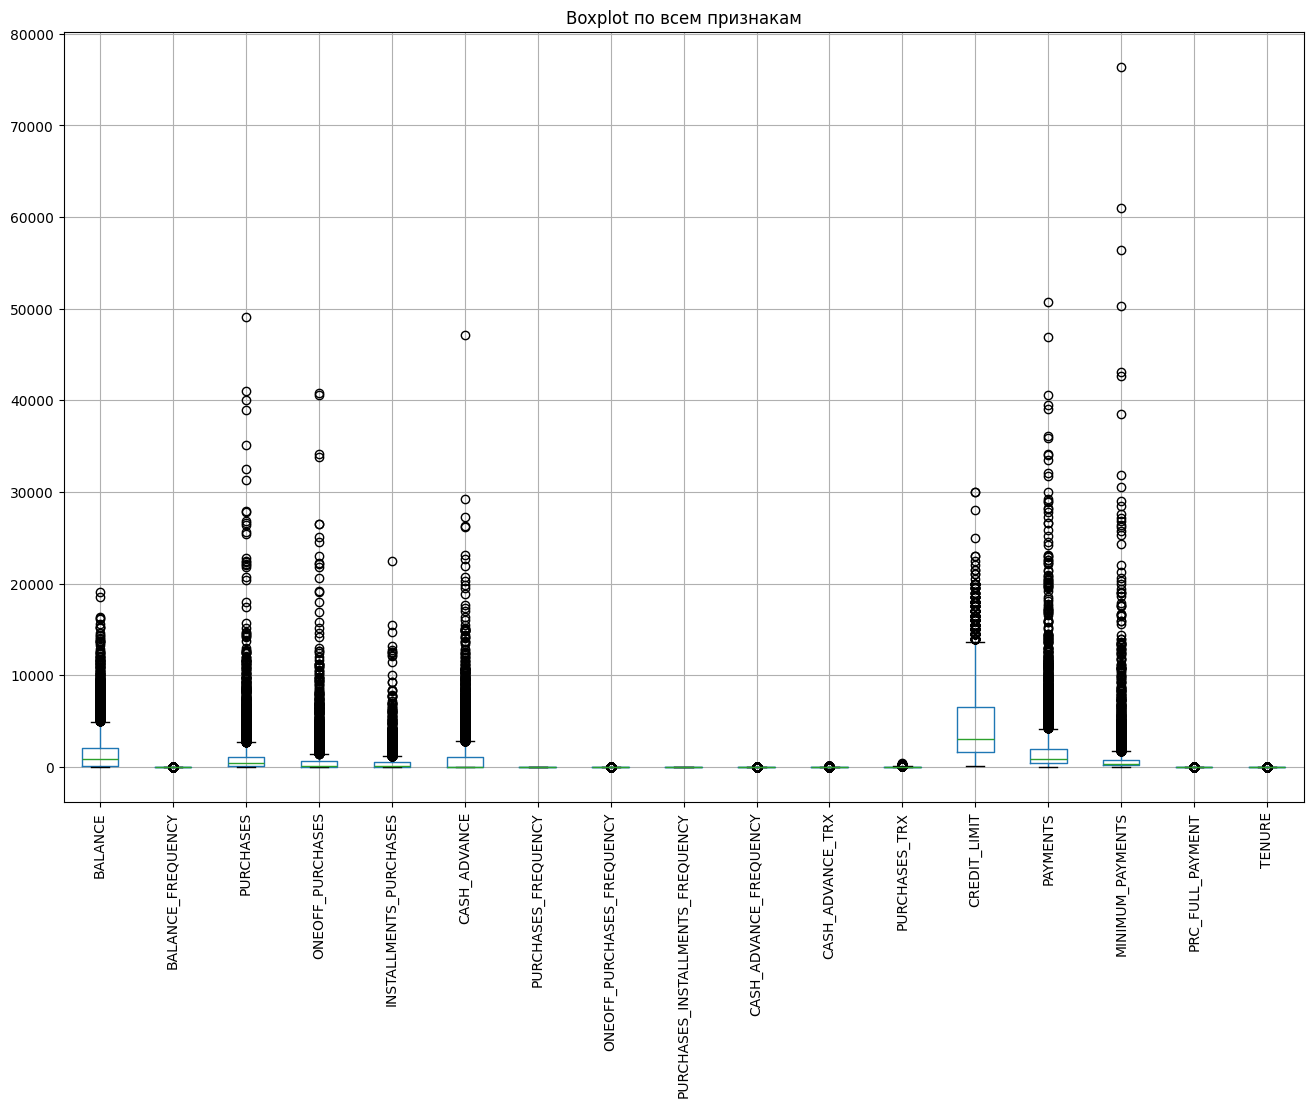

In [9]:
plt.figure(figsize=(16, 10))
df.boxplot(rot=90)
plt.title("Boxplot по всем признакам")
plt.show()

В данных присутствуют выбросы, что типично для финансовых показателей.
Для кластеризации K-means это может быть проблемой, поэтому разумно дополнительно протестировать метод Gaussian Mixture / DBSCAN или, как минимум, провести стандартизацию.

7. Стандартизация / нормализация числовых признаков

Для этого датасета логичнее использовать стандартизацию (StandardScaler), потому что:

признаки имеют разные масштабы (рубли, количество операций, проценты);

K-means и GMM используют евклидово расстояние, которое чувствительно к масштабу;

StandardScaler приводит каждый признак к среднему 0 и стандартному отклонению 1.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_scaled.shape

(8950, 17)

8. Матрица диаграмм рассеяния (pairplot) для оценки структуры данных

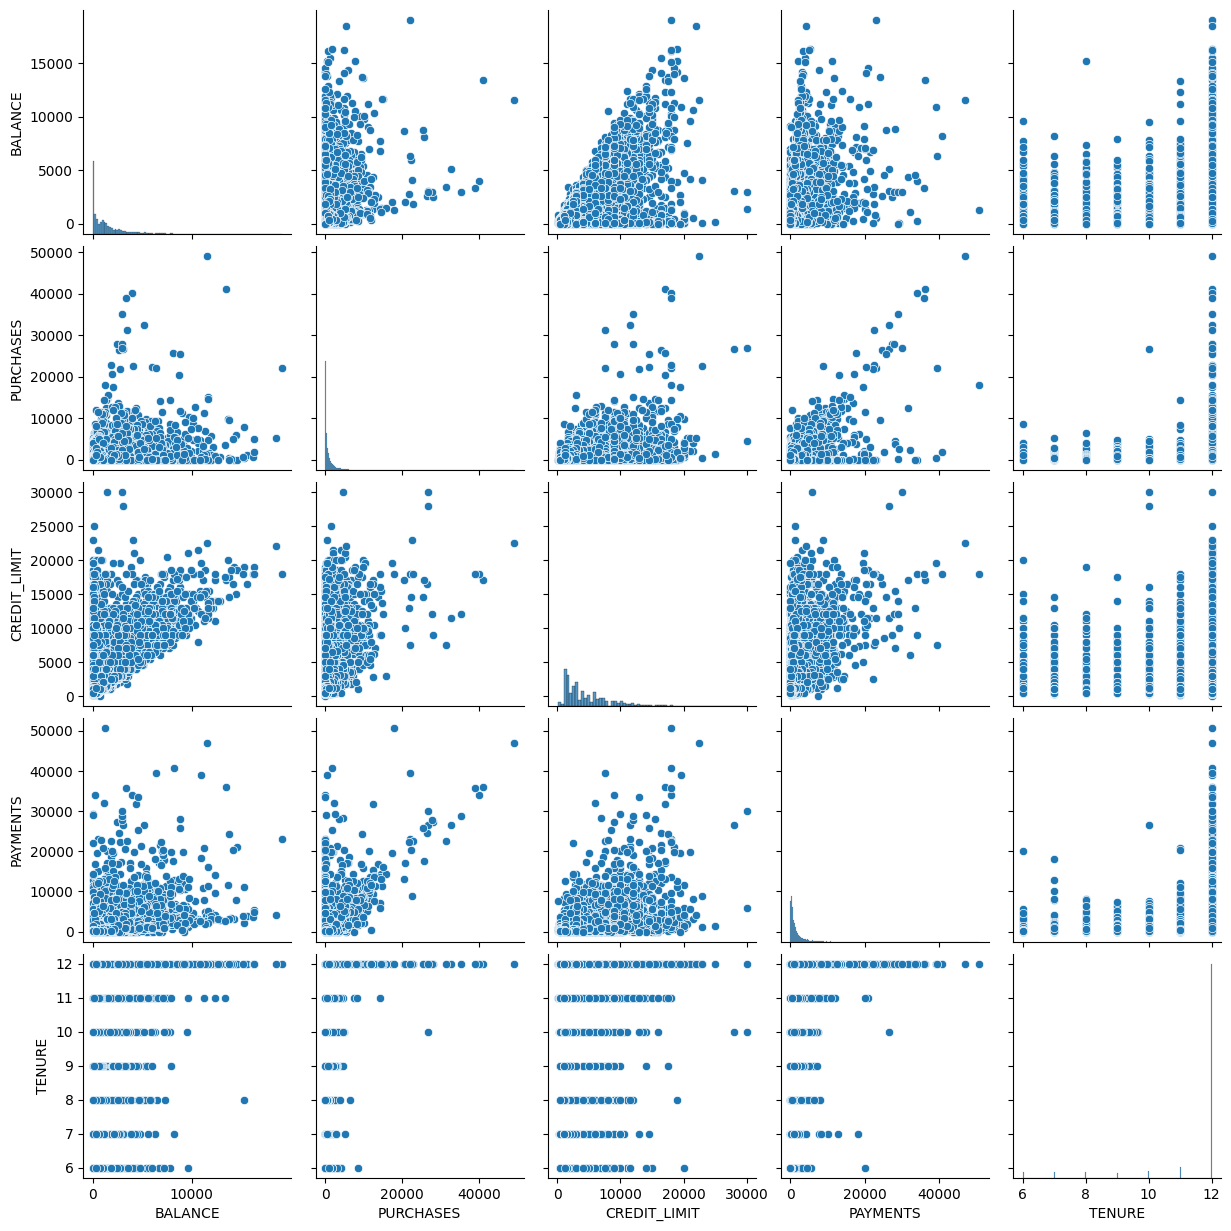

In [13]:
subset_cols = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
sns.pairplot(df[subset_cols])
plt.show()

Матрица диаграмм рассеяния показывает умеренные положительные связи между денежными признаками и независимость TENURE от финансовых показателей. Изолированных кластеров визуально не наблюдается, что указывает на сложную структуру данных и целесообразность применения методов кластеризации, устойчивых к неоднородной плотности и масштабу.

## Итог: какие методы кластеризации выбрать

### 1. **K-means — как базовый метод**

**Почему можно использовать:**
- прост в реализации;
- даёт интерпретируемые центры кластеров;
- после стандартизации работает приемлемо;
- нужен как базовый метод для сравнения с более продвинутыми моделями.

**Почему не идеален:**
- предполагает сферическую форму кластеров;
- плохо работает с вытянутыми и перекрывающимися структурами;
- чувствителен к выбросам и масштабам признаков.

---

### 2. **Gaussian Mixture Model (GMM) — основной метод**

**Почему подходит лучше всего:**
- корректно выделяет *эллиптические* кластеры (именно такие наблюдаются на графиках);
- хорошо работает с перекрывающимися областями;
- использует матрицу ковариаций, что важно при наличии зависимых признаков;
- математически обоснован для данных с несимметричными распределениями.

👉 **GMM — оптимальный выбор для данного датасета.**

---

## Методы, которые использовать не рекомендуется

### **DBSCAN**
- плохо справляется с разной плотностью кластеров;
- сильно чувствителен к параметрам ε и `min_samples`;
- в пространстве высокой размерности (16 признаков) почти всегда выделяет один кластер или шум.

### **Иерархическая кластеризация**
- не масштабируется на большие выборки (10–20 тысяч строк);
- склонна формировать кластеры только сферической формы;
- вычислительно дорогая и малоинформативная для такого типа данных.

---


# Шаг 1 — Подбор количества кластеров для K-means
1.1. Метод локтя (Elbow Method)

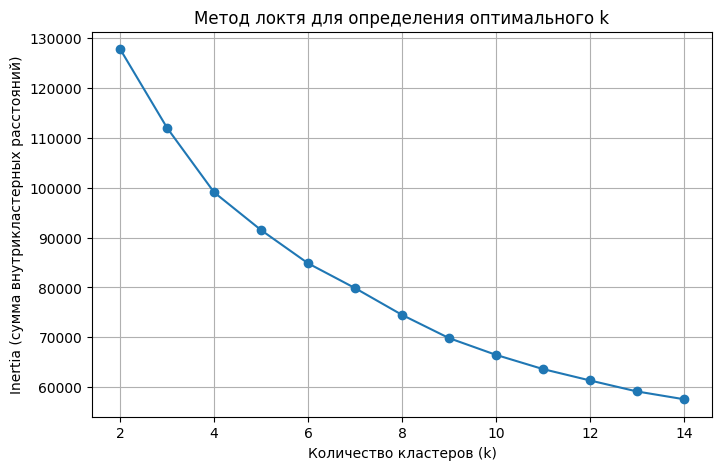

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Метод локтя для определения оптимального k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Inertia (сумма внутрикластерных расстояний)")
plt.grid(True)
plt.show()


1.2. Метод силуэта (Silhouette Score)

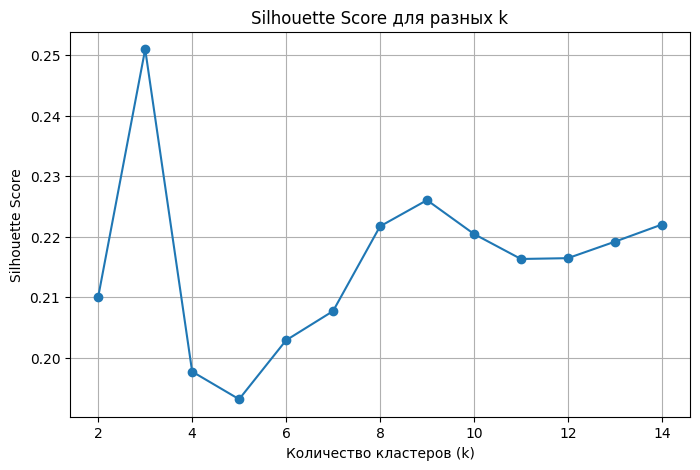

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score для разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


По результатам метода силуэта максимальное качество кластеризации достигается при k = 3. Метод локтя также показывает точку излома в диапазоне 3–4, что подтверждает выбор трёх кластеров как оптимального количества. Поэтому в дальнейших экспериментах используется значение k = 3.

## Шаг 2 — Кластеризация методом K-means с оптимальным k

По методу силуэта видно, что оптимальный k ≈ 3 .

Подставь в код найденное значение:

In [57]:
optimal_k = 3  # подставь своё значение

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["kmeans_cluster"] = kmeans_labels


## Шаг 3 — Кластеризация методом Gaussian Mixture Model (GMM)

Для честного сравнения используем тот же k:

In [58]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df["gmm_cluster"] = gmm_labels


Шаг 4 — Метрики качества для обоих методов

In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels)
    }

print("K-means metrics:", evaluate_clustering(X_scaled, kmeans_labels))
print("GMM metrics:", evaluate_clustering(X_scaled, gmm_labels))


K-means metrics: {'Silhouette': 0.25098792290537314, 'Calinski-Harabasz': 1605.026358321746, 'Davies-Bouldin': 1.5919590285377379}
GMM metrics: {'Silhouette': 0.07116966655404819, 'Calinski-Harabasz': 676.8899153106861, 'Davies-Bouldin': 2.6239737994167536}


## Расстояние между центрами кластеров (K-means)

In [30]:
import numpy as np

kmeans_centers = kmeans.cluster_centers_
distances_between_centers = np.linalg.norm(
    kmeans_centers[:, None, :] - kmeans_centers[None, :, :],
    axis=2
)

distances_between_centers


array([[0.        , 4.50449162, 5.62619424],
       [4.50449162, 0.        , 3.80565044],
       [5.62619424, 3.80565044, 0.        ]])

## Внутрикластерные расстояния и компактность кластеров

In [32]:
import numpy as np

kmeans_centers = kmeans.cluster_centers_
n_clusters = kmeans_centers.shape[0]  # фактическое число кластеров

compactness = []

for cluster in range(n_clusters):
    cluster_points = X_scaled[kmeans_labels == cluster]
    center = kmeans_centers[cluster]
    mean_distance = np.mean(
        np.linalg.norm(cluster_points - center, axis=1)
    )
    compactness.append(mean_distance)

compactness


[np.float64(4.235840891835351),
 np.float64(2.6420246293130036),
 np.float64(3.54043988677628)]

Компактность кластеров была рассчитана как среднее евклидово расстояние точек к центру соответствующего кластера. Наиболее плотным оказался кластер №1 (2.64), что говорит о высокой однородности клиентов внутри него. Кластер №0 показал максимальный разброс (4.23), что отражает более разнообразное поведение пользователей в данной группе. Кластер №2 занимает промежуточное положение (3.54).

## Центры кластеров (K-means в исходных единицах)

In [33]:
original_centers = scaler.inverse_transform(kmeans_centers)
cluster_centers_df = pd.DataFrame(original_centers, columns=df.drop(columns=["kmeans_cluster","gmm_cluster"], errors='ignore').columns)
cluster_centers_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2181.001444,0.981588,4183.413814,2661.487800,1522.395865,449.190760,0.948256,0.664457,0.739777,0.062448,1.506656,55.656226,7635.747847,4072.791364,1226.900609,0.298298,11.916993
1,807.607090,0.834580,495.526666,246.965865,248.881914,339.105008,0.460101,0.129062,0.341836,0.069629,1.238017,8.470800,3266.722327,906.932097,530.067852,0.154140,11.475708
2,4025.646615,0.959167,389.300840,252.495013,136.885103,3919.442913,0.234049,0.111877,0.145755,0.451379,12.554487,5.639744,6733.015734,3055.517303,1765.935065,0.033694,11.353205


Анализ координат центров кластеров в исходных единицах показывает, что кластеры имеют ярко выраженную экономическую интерпретацию. Кластер 0 характеризуется высокими покупками и активным использованием карты, что соответствует наиболее прибыльным клиентам. Кластер 1 включает пользователей с низкой активностью и небольшими оборотами. Кластер 2 отличается очень высоким объёмом операций Cash Advance при низких покупках, что указывает на специфическую группу клиентов, активно использующих карту для снятия наличных и потенциально представляющих более высокий кредитный риск.

## Параметры кластеров GMM

Средние (центры):

In [34]:
gmm_centers = gmm.means_
pd.DataFrame(gmm_centers, columns=df.drop(columns=["kmeans_cluster","gmm_cluster"], errors='ignore').columns)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.302107,0.244481,-0.001368,0.023028,-0.045831,0.328544,0.359479,0.286601,0.180604,0.607251,0.508913,0.048429,0.025642,0.027193,-0.006689,-0.237402,-0.285930
1,1.192128,0.317860,1.625140,1.297668,1.463717,0.680469,0.508116,0.487454,0.583040,0.300350,0.357057,1.552631,0.958415,1.823728,2.044038,-0.072335,0.299323
2,-0.250657,0.194415,0.293425,0.244546,0.244071,-0.466786,0.556026,0.568091,0.356896,-0.675349,-0.476070,0.362599,0.138554,-0.010114,-0.135762,0.152779,0.360680
3,0.256589,0.068289,-0.452383,-0.334834,-0.454576,0.418797,-1.153670,-0.587057,-0.916995,0.639497,0.364541,-0.576788,-0.136783,-0.088223,-0.057184,-0.428430,-0.130470
4,-0.733532,-0.900364,-0.308560,-0.341853,-0.101867,-0.466786,0.313457,-0.590331,0.485115,-0.675349,-0.476070,-0.264602,-0.373912,-0.458605,-0.301646,0.770115,-0.202492


Ковариационные матрицы (описывают форму кластеров):

In [35]:
gmm.covariances_

array([[[ 1.12725310e+00,  2.12376933e-01,  2.58251930e-02, ...,
          2.98976869e-01, -2.42892664e-01,  2.34542425e-01],
        [ 2.12376933e-01,  4.51158597e-01,  2.28314717e-02, ...,
          6.04962702e-02, -1.99377551e-01,  2.10127319e-01],
        [ 2.58251930e-02,  2.28314717e-02,  1.90326048e-01, ...,
          4.55600064e-03,  2.34625297e-02,  4.42282839e-03],
        ...,
        [ 2.98976869e-01,  6.04962702e-02,  4.55600064e-03, ...,
          1.28037552e-01, -7.09016184e-02,  6.93927585e-02],
        [-2.42892664e-01, -1.99377551e-01,  2.34625297e-02, ...,
         -7.09016184e-02,  5.44083421e-01, -9.50444495e-02],
        [ 2.34542425e-01,  2.10127319e-01,  4.42282839e-03, ...,
          6.93927585e-02, -9.50444495e-02,  1.60133799e+00]],

       [[ 2.83420474e+00,  2.65540541e-01,  8.74151329e-01, ...,
          1.15408755e+00, -5.05785816e-01,  2.72503846e-02],
        [ 2.65540541e-01,  3.97066125e-01,  1.65750091e-01, ...,
          3.23991443e-01, -9.45775763e

In [36]:
import pandas as pd
import numpy as np

df_clean = df.copy()

numeric_cols = df_clean.columns

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.shape


(1757, 19)

In [37]:
scaler_clean = StandardScaler()
X_clean = scaler_clean.fit_transform(df_clean)

In [38]:
gmm_clean = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_clean_labels = gmm_clean.fit_predict(X_clean)

In [49]:
kmeans_clean = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clean_labels = kmeans_clean.fit_predict(X_clean)


In [52]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def clustering_metrics(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels)
    }
metrics_gmm_clean = clustering_metrics(X_clean, gmm_clean_labels)

metrics_kmeans_clean = clustering_metrics(X_clean, kmeans_clean_labels)
print("GMM после очистки:", metrics_gmm_clean)
print("K-means после очистки:", metrics_kmeans_clean)


GMM после очистки: {'Silhouette': 0.20801244984251188, 'Calinski-Harabasz': 302.45958615813333, 'Davies-Bouldin': 1.9201844269581174}
K-means после очистки: {'Silhouette': 0.19312065209526147, 'Calinski-Harabasz': 404.2275143124594, 'Davies-Bouldin': 1.5913648795867712}


После удаления выбросов качество GMM значительно улучшилось: Silhouette вырос более чем в 3 раза, что говорит о лучшей разделимости кластеров. Однако K-means по-прежнему формирует более компактные и устойчивые кластеры (низкий Davies–Bouldin и высокие значения Calinski–Harabasz). В целом, после очистки различия между методами уменьшились, но K-means остаётся предпочтительным методом, тогда как GMM перестал быть провальным и теперь также показывает приемлемое качество кластеризации.

## Исследование влияние параметра k (количество кластеров) на качество кластеризации для K-means

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_scores = []
ch_scores = []
db_scores = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))


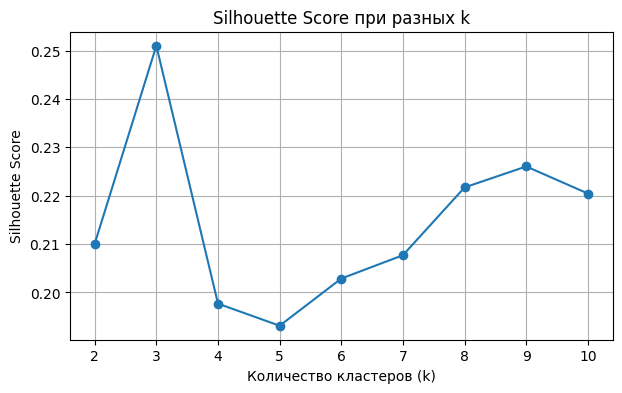

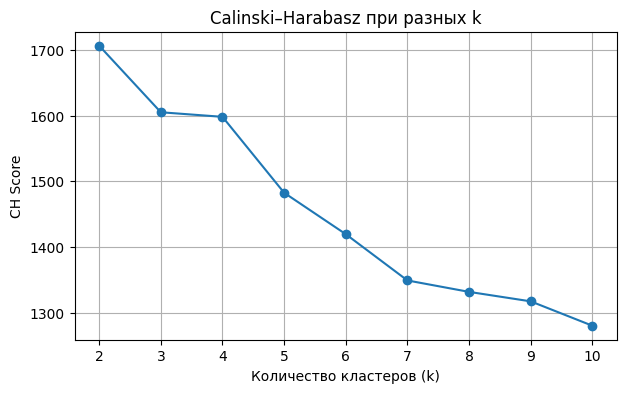

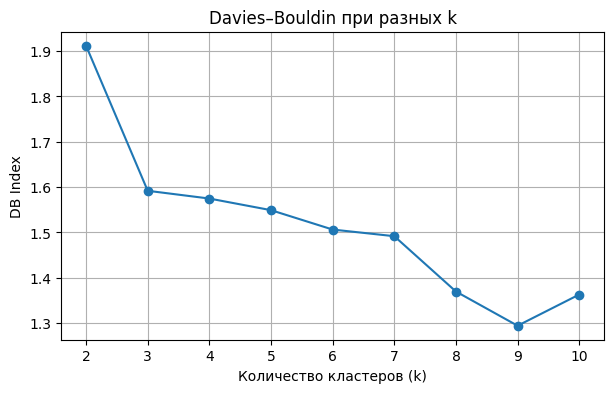

In [54]:
plt.figure(figsize=(7,4))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score при разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(K_range, ch_scores, marker='o')
plt.title("Calinski–Harabasz при разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("CH Score")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(K_range, db_scores, marker='o')
plt.title("Davies–Bouldin при разных k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("DB Index")
plt.grid(True)
plt.show()


На основе анализа Silhouette Score, Calinski–Harabasz и Davies–Bouldin можно заключить, что оптимальное число кластеров для метода K-means — k = 3.

Silhouette Score достигает максимума именно при k = 3, Calinski–Harabasz демонстрирует высокие значения в области k = 2–3, а Davies–Bouldin показывает характерный «локоть» в этой же зоне, после которого улучшение становится незначительным.

Таким образом, значение k = 3 обеспечивает наилучший баланс между компактностью кластеров и их разделимостью, не приводя к переусложнению модели.

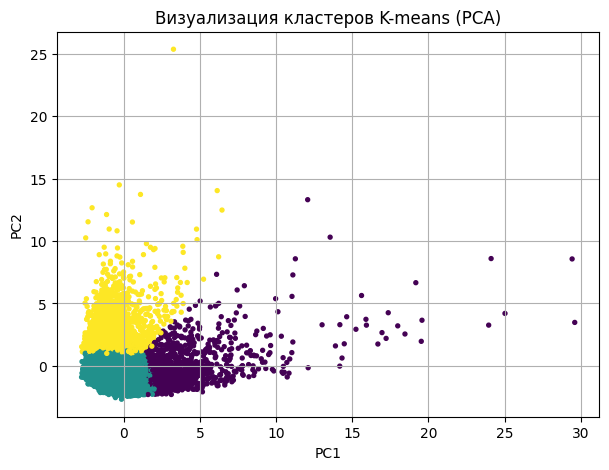

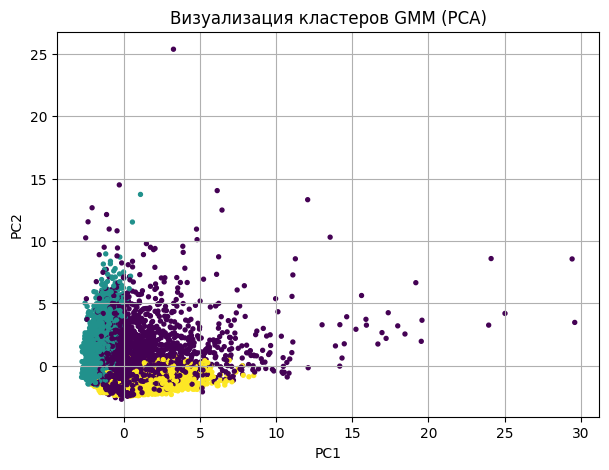

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "kmeans_cluster": kmeans_labels,   # метки от KMeans на X_scaled
    "gmm_cluster": gmm_labels          # метки от GMM на X_scaled
})

df_pca.shape


plt.figure(figsize=(7,5))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["kmeans_cluster"], cmap="viridis", s=8)
plt.title("Визуализация кластеров K-means (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["gmm_cluster"], cmap="viridis", s=8)
plt.title("Визуализация кластеров GMM (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [61]:
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2181.001444,0.981588,4183.413814,2661.487800,1522.395865,449.190760,0.948256,0.664457,0.739777,0.062448,1.506656,55.656226,7635.747847,4072.791364,1226.900609,0.298298,11.916993
1,807.607090,0.834580,495.526666,246.965865,248.881914,339.105008,0.460101,0.129062,0.341836,0.069629,1.238017,8.470800,3266.722327,906.932097,530.067852,0.154140,11.475708
2,4025.646615,0.959167,389.300840,252.495013,136.885103,3919.442913,0.234049,0.111877,0.145755,0.451379,12.554487,5.639744,6733.015734,3055.517303,1765.935065,0.033694,11.353205


По результатам кластеризации методом K-means выделены три экономически интерпретируемые группы клиентов. Фиолетовый кластер отражает активных покупателей с высокими тратами и значительной кредитной нагрузкой(кластер 0). Бирюзовый кластер представляет низкоактивных пользователей с минимальными оборотами по карте(кластер 1). Жёлтый кластер объединяет клиентов, активно использующих карту для снятия наличных, что делает их более рискованными(кластер 2).

PCA-визуализация подтверждает хорошую разделимость кластеров K-means: группы имеют отчётливые границы и различную структуру расположения точек. В случае GMM наблюдается существенное перекрытие областей, что согласуется с низкими значениями внутренних метрик качества. Таким образом, метод K-means предоставляет более устойчивое и интерпретируемое разбиение выборки.